In [6]:
# Gpaarte Stichprpoben: 
# Vergleich von zwei Datensätzen, wobei die Daten paarweise zugeordnet sind. 
# --> data_1[0] und data_2[0] sind direkt mit einander vergleichbar.
import numpy as np
import pymc as pm
import arviz as az
import scipy.stats as st
import matplotlib.pyplot as plt


data_1 = np.array([120, 265, 157, 187, 219, 288, 156, 205, 163])
data_2 = np.array([127, 281, 160, 185, 220, 298, 167, 203, 171])
data = data_1 - data_2

Text(0.5, 1.0, 'Differenz Alter')

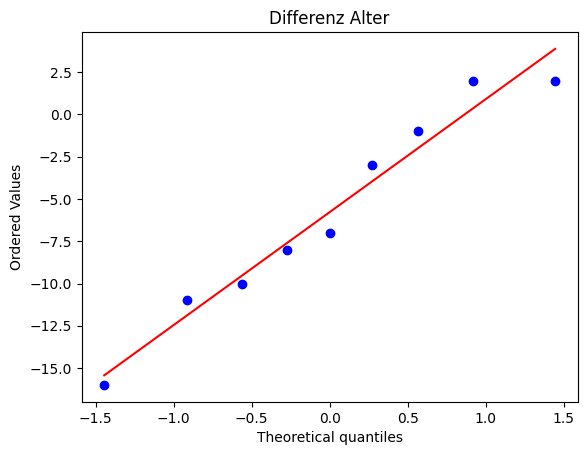

In [7]:
# prüfen ob Normalverteilt: 
st.probplot(data,plot=plt)
plt.title("Differenz Alter")
plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 13 seconds.


<Axes: title={'center': 'mu'}>

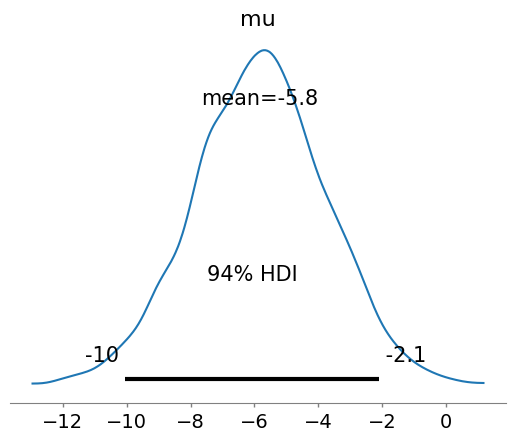

In [8]:
# Berechnung Durchführen 

sigma = 6.2 # Standardabweichung, falls gegeben 
# sigma = data.std() # Standardabweichung, falls unbekannt

lower = -20 # untere Grenze
upper = 20 # obere Grenze

with pm.Model() as model_paired:
    mu = pm.Uniform('mu', lower=lower, upper=upper)
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=data)
    trace_paired = pm.sample(1000)

az.plot_posterior(trace_paired)
az.summary(trace_paired)

Mögliche Fragestellung: Gibt es einen relevanten Unterschied zwischen datensatz 1 und datensatz 2? 
--> In diesem fall ja, denn 0 (keine Differenz) liegt nicht im HDI